In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy
import pandas as pd

### Download the data 

In [2]:
url = 'https://raw.githubusercontent.com/UCHIC/CIWS-VisChallenge/master/2020_Challenge/data/Classified_Events.csv'
df = pd.read_csv(url, error_bad_lines=False)

               StartTime              EndTime  Duration(min)  Volume(gal)  \
0    2020-07-21 09:44:00  2020-07-21 09:45:00       0.466667     0.915618   
1    2020-07-21 09:45:00  2020-07-21 09:46:00       0.266667     0.457809   
2    2020-07-21 10:04:00  2020-07-21 10:05:00       0.733333     0.541047   
3    2020-07-21 10:05:00  2020-07-21 10:07:00       1.200000     3.495996   
4    2020-07-21 10:08:00  2020-07-21 10:08:00       0.333333     0.332952   
..                   ...                  ...            ...          ...   
817  2020-08-04 08:21:00  2020-08-04 08:21:00       0.266667     0.166476   
818  2020-08-04 08:35:00  2020-08-04 08:36:00       0.866667     2.164188   
819  2020-08-04 08:39:00  2020-08-04 08:46:00       7.200000    12.152748   
820  2020-08-04 08:49:00  2020-08-04 08:50:00       0.533333     0.332952   
821  2020-08-04 08:51:00  2020-08-04 08:51:00       0.266667     0.166476   

     Flowrate(gpm)  Peak_Value(gpm)  Mode_Value(gpm)   Label  
0         1.

### Let's start by visualizing a summary of the data 

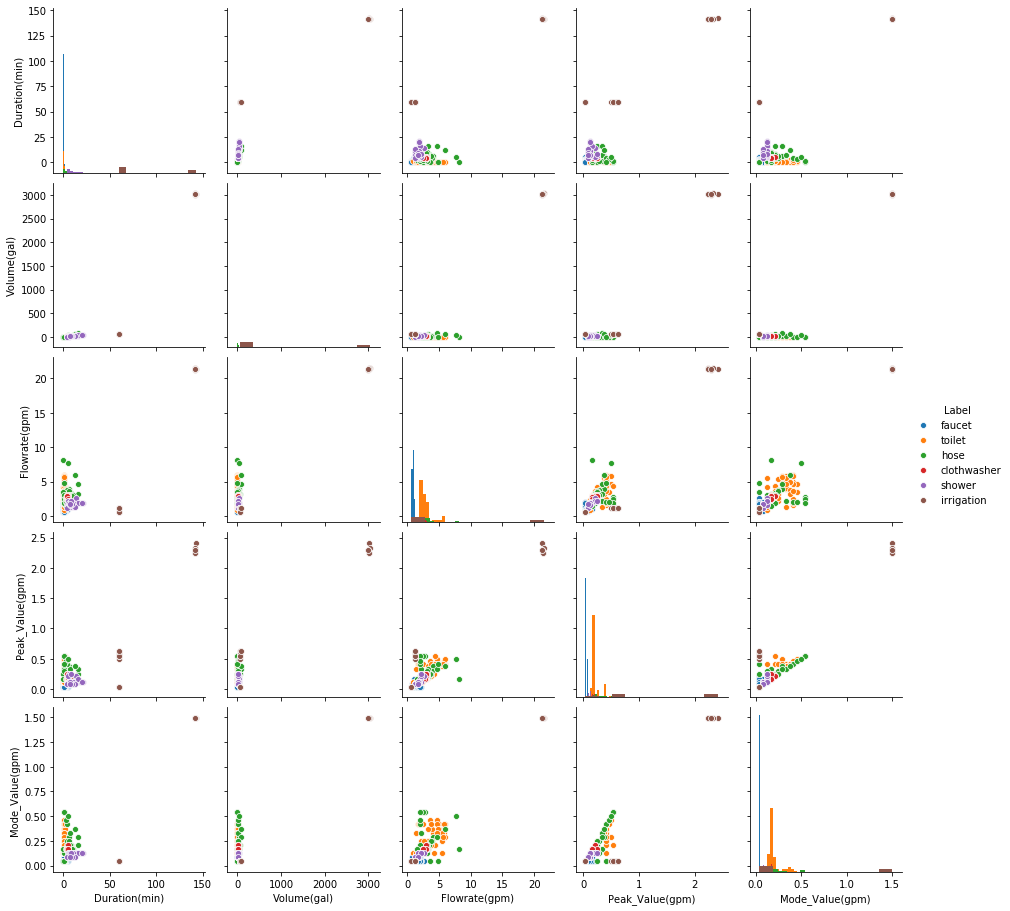

In [3]:
sns.pairplot(df, hue = "Label", diag_kind="hist")

Clearly irrigation obscures the behavior of the other classes. We can visualize again without it.

In [4]:
# remove irrigation 
df_noIrrigation = df[df['Label'] != 'irrigation']

Text(0.5, 0.98, 'Your Title')

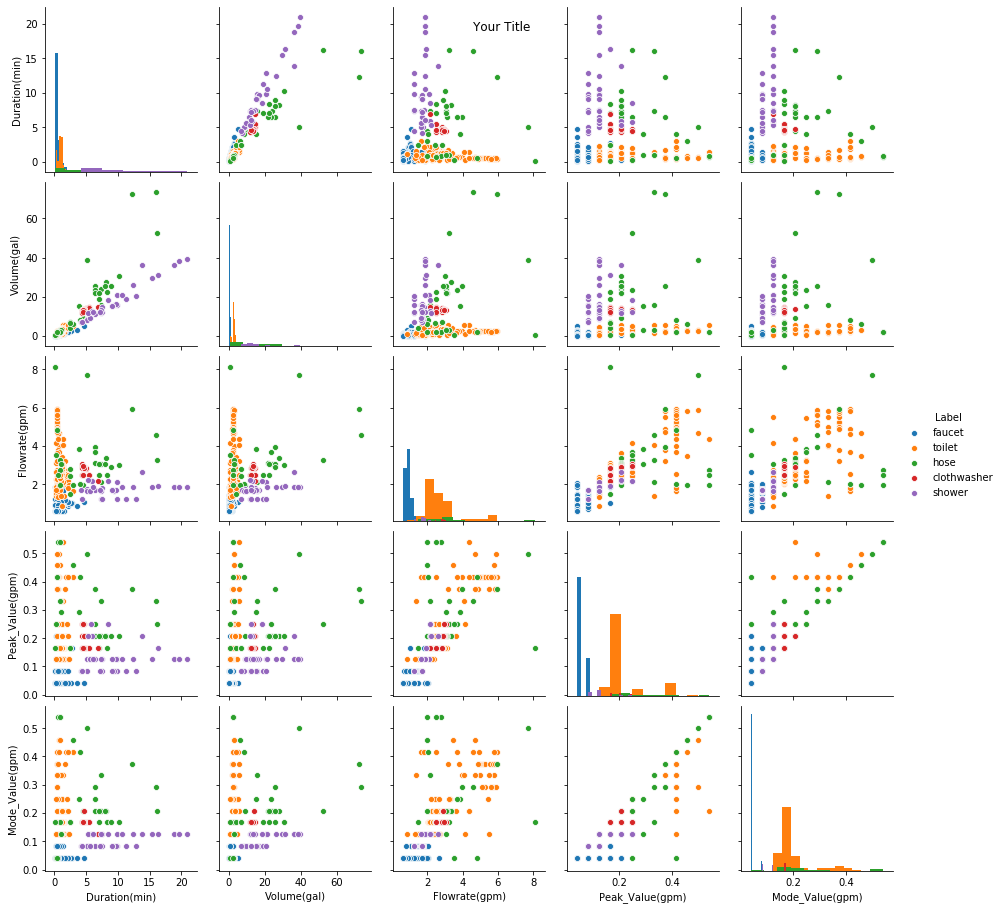

In [29]:
sns.pairplot(df_noIrrigation, hue = "Label", diag_kind="hist")

#### We can observe some patterns in the data 
- Hose uses are more disperse 
- The flowrate clearly influences the slope in duration vs volume
- mode and peak have a kind of dicrete behavior across all uses
- There is some separation between classes with the given features

### Dimensionality reductions methods to visulize the data in a more compressed way

In [6]:
import phate
import umap
from sklearn.decomposition import PCA

In [7]:
data = np.array(df_noIrrigation.iloc[:,2:7])
classes = np.array(df_noIrrigation.iloc[:,7])
# normalize data for better pca
data_n = scipy.stats.zscore(data)

C:\Users\Andres Duque\AppData\Roaming\Python\Python37\site-packages\graphtools\graphs.py:293: RuntimeWarning: Detected zero distance between 5094 pairs of samples. Consider removing duplicates to avoid errors in downstream processing.
  RuntimeWarning,
C:\Users\Andres Duque\AppData\Roaming\Python\Python37\site-packages\graphtools\graphs.py:451: RuntimeWarning: overflow encountered in power
  K.data = np.exp(-1 * np.power(K.data, self.decay))


    Using SMACOF because SGD returned NaN


Text(0.5, 1.0, 'UMAP dimensionality reduction')

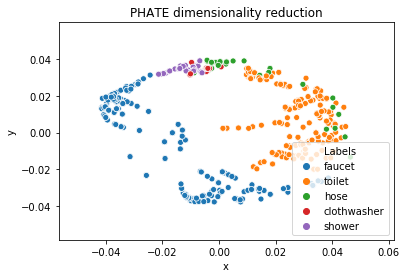

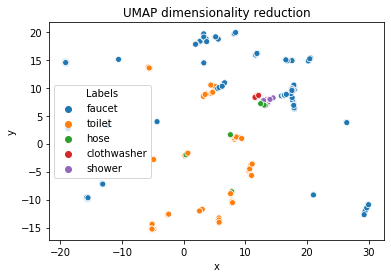

In [24]:
phate_m = phate.PHATE(verbose = False)
z_phate = phate_m.fit_transform(data_n)
phate_df = pd.DataFrame(np.hstack((z_phate, classes.reshape(len(classes),1))), columns=["x", "y", "Labels"])
plt.figure()
sns.scatterplot("x", "y", hue = "Labels", data = phate_df)
plt.title("PHATE dimensionality reduction")

z_umap = umap.UMAP(n_neighbors = 5).fit_transform(data_n)
umap_df = pd.DataFrame(np.hstack((z_umap, classes.reshape(len(classes),1))), columns=["x", "y", "Labels"])
plt.figure()
sns.scatterplot("x", "y", hue = "Labels", data = umap_df)
plt.title("UMAP dimensionality reduction")



Text(0.5, 1.0, 'PCA dimensionality reduction')

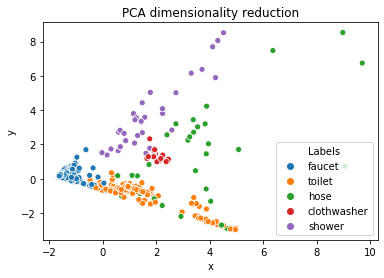

In [9]:
z_pca = PCA(n_components=2).fit_transform(data_n)
pca_df = pd.DataFrame(np.hstack((z_pca, classes.reshape(len(classes),1))), columns=["x", "y", "Labels"])
sns.scatterplot("x", "y", hue = "Labels", data = pca_df)
plt.title("PCA dimensionality reduction")

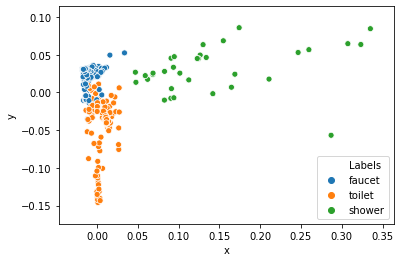

In [20]:
from sklearn.manifold import Isomap, LocallyLinearEmbedding
isomap_m = LocallyLinearEmbedding(n_components=2, n_neighbors = 40, method = 'hessian')
z = isomap_m.fit_transform(data_uses)
pca_df = pd.DataFrame(np.hstack((z, np.array(df_uses.iloc[:,7])[:, None])), columns=["x", "y", "Labels"])
sns.scatterplot("x", "y", hue = "Labels", data = pca_df)

#### Observations 
- There is a good separation between clases, it would be nice to see train vs test data 


## Toilet and shower 

It might be nice to see the behavior of these two, since are the ones you can replace if there is anomaly behavior probably due to one shower or one toilet consuming more than the rest

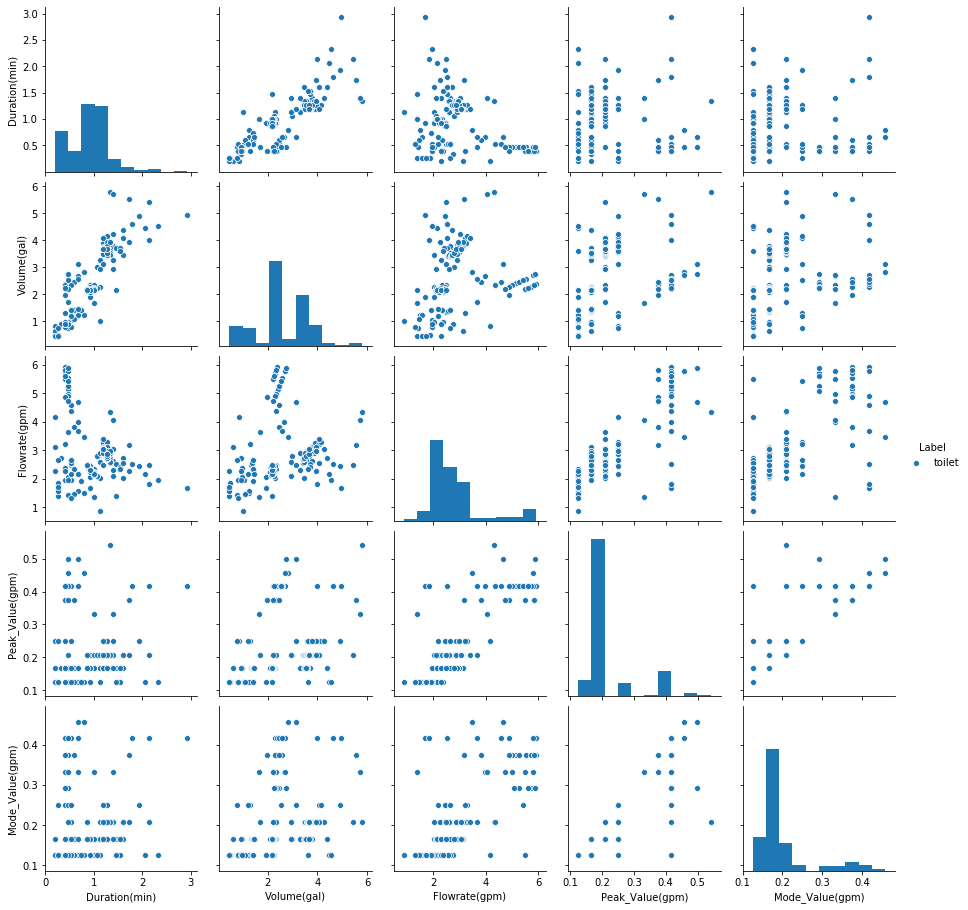

In [27]:
## Toilet
uses =  ['toilet']
df_toilet = df_noIrrigation[df_noIrrigation.Label.isin(uses)]
sns.pairplot(df_toilet, hue = "Label", diag_kind="hist")

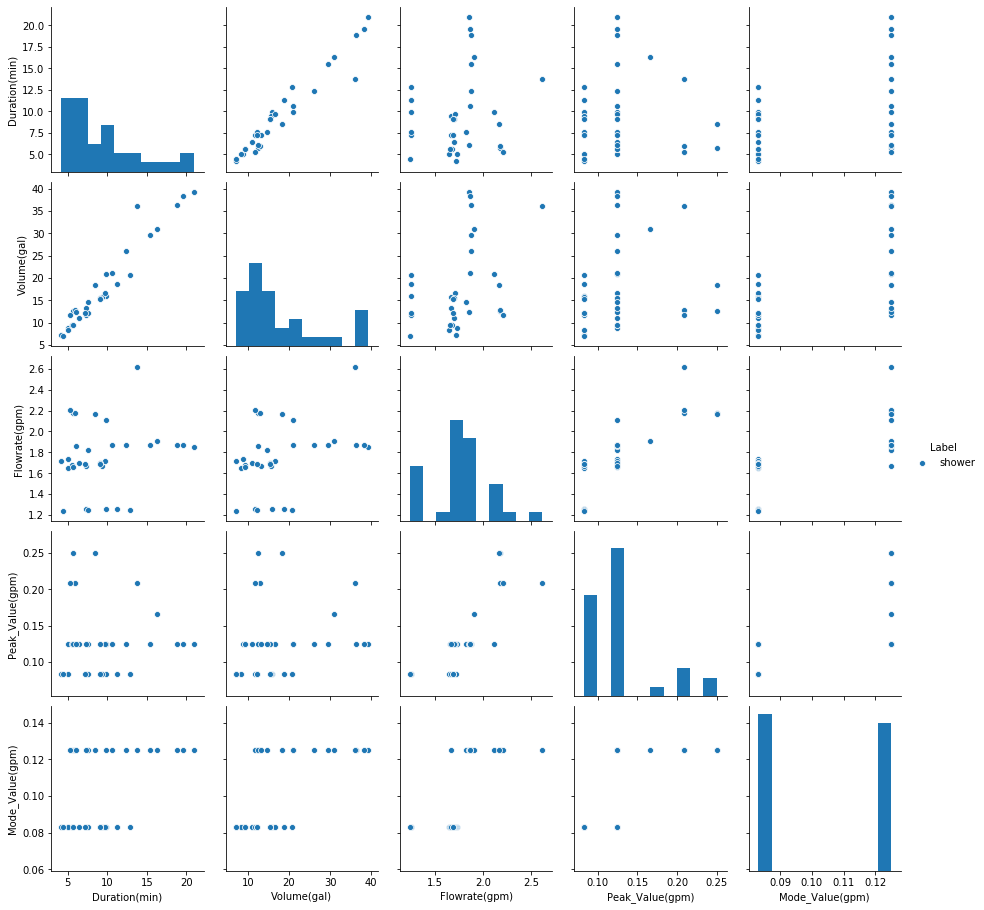

In [26]:
## SHOWER 
uses =  ['shower']
df_shower = df_noIrrigation[df_noIrrigation.Label.isin(uses)]
sns.pairplot(df_shower, hue = "Label", diag_kind="hist")

#### Observations 
- There seem to be two different modes for the showers, and five different peak values.
- One showeer had more flowrate than the rest 